# Article 9


## Objectif:

Cartographier les acteurs de la proposition de loi de l'article 9

### Découverte du dataset

Un fichier json avec les donnees relatives a l'article 9 est disponible
article9.json

    ! Le détail des votes par utilisateurs n'est disponible que dans le fichier participants

Ce fichier représente les données sous forme de dictionnaire: accessible par clé,valeur nous l'avons 
stocké dans la variable **article9**

La première démarche pour connaîre les données et d'afficher les clés disponibles du dictionnaires

Affichons les clés du dictionnaire:

In [59]:
import json, pprint
#afficher les données plus zouliement avec indentation
pp = pprint.PrettyPrinter(indent=4, depth=4)
with open("article9.json", "r") as f:
    article9 = json.load(f)
    pp.pprint(article9.keys())

[   u'subtitle',
    u'cat_id',
    u'updated_at',
    u'sources',
    u'arguments_count',
    u'versions_count',
    u'votes_total',
    u'author',
    u'article_link',
    u'arguments',
    u'answer',
    u'body',
    u'ranking',
    u'sources_count',
    u'votes_ok',
    u'versions',
    u'article_id',
    u'body_anchors',
    u'created_at',
    u'title',
    u'votes_mitige',
    u'body_links',
    u'votes_nok']


* Statistiques descriptives de l'article 9:

Nous allons charger les informations disponibles dans une **variable** appelée re_article9
qui va contenir les differents champs statistiques disponibles en les réorganisant légèrement pour une plus grande facilité de manipulation. 
Ici nous filtrons les clés du dictionnaires en fonction de leur nom que nous connaissons grace à la manipulation 
ci-dessus.

On va réorganiser de la facon suivante
[  # l'identifiant de l'article est l'url
    #on le transfrome en id
    u'article_link',
    #date
    u'created_at',
    u'updated_at',
    #stats
    u'arguments_count',
    u'versions_count',
    u'votes_total',
    u'sources_count',
    
    # repartition des votes
    u'votes_ok',
    u'votes_mitige'
    u'votes_nok'
    #détails participation
    u'versions',
    u'sources',
    u'arguments',
    u'votes',
    ]

{   u'arguments_nb': 132,
    u'sources_nb': 22,
    u'versions_nb': 108,
    'votes': {   u'mitige': 282, u'nok': 1732, u'ok': 1320},
    u'votes_nb': 3334}


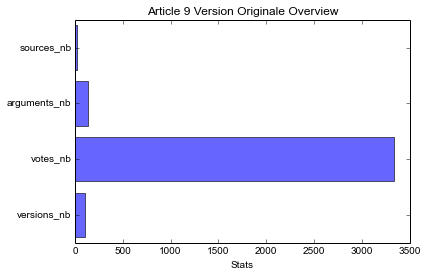

[(u'ok', 1320), (u'nok', 1732), (u'mitige', 282)]


AttributeError: 'list' object has no attribute 'keys'

In [25]:
import json, pprint
ref_article9 = {"date": {}, "stats": {"votes":{}}, "details": {"votes":[]}, "votes":{}}
#pour afficher les données joliement
pp = pprint.PrettyPrinter(indent=4)
with open("article9.json", "r") as f:
    data = json.load(f)
    for k,v in data.items():
        
        if k == "article_link":
            ref_article9["id"] = v
        #match with date elemnts
        if k.endswith("at"):
            ref_article9["date"][k] = v
        elif k.endswith("count"):
            ref_article9["stats"][k.replace("count", "nb")] = v
        elif k.endswith("total"):
            ref_article9["stats"][k.replace("total", "nb")] = v
        elif k.startswith("votes"):
            ref_article9["stats"]["votes"][k.replace("votes_","")] = v
            
        else:
            if k in ["versions", "sources", "arguments"]:
                ref_article9["details"][k] = v
            pass
        #stats = {k:v for k,v in data.items() if k.endswith("at") and if  and if k.endswith("total") and if k.startswith("votes")}
pp.pprint(ref_article9["stats"])
#resultats des statistiques de l'article
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

data = {k: v for k,v in ref_article9["stats"].items() if k.endswith("_nb")}
values = data.keys()

y_pos = np.arange(len(values))
performance = data.values()
plt.barh(y_pos, performance, align='center', alpha=0.6)
plt.yticks(y_pos, values)
plt.xlabel('Stats')
plt.title('Article 9 Version Originale Overview')

plt.show()

data = sorted(ref_article9["stats"]["votes"].items(), key=lambda(k,v):k, reverse=True)
print data
labels = [k[0] for k in data]
sizes = [k[1] for k in data]
colors = ['green', 'red', "blue"]

plt.pie(sizes, labels=labels, colors=colors,shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

fig = plt.figure()
ax = fig.gca()

L'article 9 compte donc 132 arguments,22 sources, 3334 votes et 108 versions.
Dans "details":
* Chaque argument contient le nombre de votes concernant l'argument
* Chaque argument contient le nombre de votes concernant la version


Le nombre de votes total correspond aux votes sur l'article original et le nombre d'arguments aussi
et non pas sur l'ensemble des versions de l'article


###Les modifications de l'article
Les amemendements ou modification de l'article sont disponible 
désormais dans ref_article9["details"]["versions"] sous forme de liste de dictionnaire
Explorons donc ensemble les différentes valeurs exploitables

In [61]:
versions = {}
for version in ref_article9["details"]["versions"]:
    print pp.pprint(version.keys())
    break

[   u'comment',
    u'author',
    u'arguments_no_count',
    u'created_at',
    u'after',
    u'updated_at',
    u'id',
    u'votes_mitige',
    u'arguments_yes_count',
    u'link',
    u'arguments_count',
    u'before',
    u'title',
    u'votes_total',
    u'article_id',
    u'slug',
    u'votes_nok']
None


Nous allons réorganiser le contenu des references de versions
pour rappatrier ensuite les votes qui contient les données détaillées 

[   #u'slug',
    #u'title'
    #date
    u'created_at',
    u'updated_at',
    u'author',
    #stats
        #arguments
        u'arguments_no_count',
        u'arguments_yes_count',
        u'arguments_count',
        #votes
        u'votes_total',
        u'votes_mitige',
        u'votes_nok',
        u'votes_ok'
    ]
dans un dictionnaire
dont l'id unique sera le slug
versions[slug] = {"title":"", "date":{}, "author": "", "stats":{"votes":{}, "arguments":{}}



In [34]:
versions = {}
for vers in ref_article9["details"]["versions"]:
    versions[vers["slug"]] = {"title":vers["title"], 
                              "date":{}, 
                              "author": vers["author"], 
                              "stats":{"arguments":{},"votes":{}},
                              "arguments":[],
                              "votes":[],
                             }
    for k,v in vers.items():
        if k.endswith("at"):
            versions[vers["slug"]]["date"][k] = v
        elif k.startswith("votes"):
            versions[vers["slug"]]["stats"]["votes"][k] = v
        elif k.startswith("arguments"):
            versions[vers["slug"]]["stats"]["arguments"][k] = v
        else:
            pass
versions["original"] = ref_article9
versions["original"]["author"] = "gouvernement"
versions["original"]["votes"] = []
#versions["original"]["arguments"] = []
#On a bien 108 versions dans ce dictionnaire + 1 version originale
print len(versions.keys())
#print versions["attention-a-la-qualite-et-a-la-securite-des-textes-scientifiques-qui-doivent-etre-valides-en-amont-promus-et-enrichis-ensuite-par-le-biais-de-bases-de-donnees"]
#print versions["original"]

109


In [35]:
arguments = {}
for arg in ref_article9["details"]["arguments"]:
    #ici l'id unique est l'id
    #"arg-"+id
    arguments[arg["id"]] = {"date":{}, "stats":{"votes":{}}}
    for k, v in arg.items():
        if k.endswith("at"):
            arguments[arg["id"]]["date"][k] = v
    arguments[arg["id"]]["stats"]["votes"]["total"] = v
            

#on a bien les 132 arguments annoncés pour la version original 
print(len(arguments))

print arguments["3923"]

132
{'date': {u'created_at': u'2015-10-14T15:51:34+0200', u'updated_at': u'2015-10-14T15:52:07+0200'}, 'stats': {'votes': {'total': u'3923'}}}


Dans un deuxième temps nous allons croiser ces données avec ceux des votes
pour trouver qui a voté pour quelle modif ou quelle version
Pour cela il nous faut trouver tous les votes pour l'article9
Le détail des votes est disponible dans le fichier participants
qui liste sous forme de dictionnaire de participants toutes l'activité du participant


### Qui a voté quoi?
On va passer en revue tous les votes des participants et trouver ceux qui correspondent à l'article qui nous intéresse
en filtrant sur le nom de l'article contenu dans le lien
et construire ainsi un référentiel de votes


In [36]:
url = "section-2-travaux-de-recherche-et-de-statistique"
art = "article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics"

with open("participants.json", "r") as f:
    data = json.load(f)
    participants = data["participants"]


#rappel versions contient toutes les versions de l'article
#for slug, version in versions.items():
#    print version["votes"]
#    break
#electeurs

electeurs_d = {}
for user in participants:
    username = user.keys()[0]
    
    user_votes =  user[username]["votes"]
    
    for vote in user_votes:
        url = vote["link"]
        if not art in url:
            continue
        else:
            electeurs_d[username] = {}
            vote["user"] = username
            if "version" in url:
                #ici il s'agit d'une version mais laquelle?
                #avant vérifier que ce n'est pas un vote sur un arg, source
                if not "#arg" in url and not "#source" in url:
                    slug = url.split("/")[-1]
                    versions[slug]["votes"].append(vote)
                    electeurs_d[username][slug] = vote
                    continue
                else:
                    continue
            else:
                if not "#arg" in url and not "#source" in url:
                    slug = url.split("/")[-1]
                    #print slug
                    versions["original"]["votes"].append(vote)
                    electeurs_d[username][slug] = vote
                    continue
                else:
                    continue


                    
#on vérifie les votes                    
#votants
print len(versions["original"]["votes"])
#votes comptabilisés dans l'article
print len(ref_article9["stats"]["votes"])

print len(electeurs_d.keys())

KeyError: 'original'

In [ ]:
### Qui a voté pour qui? Pour quelle version?


In [65]:
#auteur, votant, vote, slug
final_dataset = []
for slug, version in versions.items():
    
    auteur = version["author"]
    for vote in version["votes"]:
        final_dataset.append([vote["user"],auteur,vote["opinion"], slug])
        

#On ajoute les votants à l'article original
#for votant in ref_article9["details"]["votes"]:
    #print votant
    #final_dataset.append([ vote["user"],"gouvernement",vote["opinion"], "original"])
    


In [66]:
with open("electeur_auteur.csv", "w") as f:
    f.write("\t".join(["electeur","auteur", "vote", "version"])+'\n')
    for row in final_dataset:
        f.write("\t".join(row)+'\n')
        
    

## Détection des communautés
Mais avant nous allons faire des stats pour voir si tout est bien carré!
Combien de votes en tout

In [67]:
print len(final_dataset)

12851


On a 12851 contre 3334 votes sur la version original
Maintenant vote_pour, vote_contre, votes_mitigés

In [68]:
votes_pour = []
votes_contre = []
votes_neutre = []
for vote in final_dataset:
    electeur, auteur, opinion, version = vote
    if opinion == "1":
        votes_pour.append(vote)
    elif opinion == "-1":
        votes_contre.append(vote)
    else:
        votes_neutre.append(vote)
print "votes pour: %i , votes contre: %i votes neutres:%i" %(len(votes_pour),len(votes_contre), len(votes_neutre))

votes pour: 8926 , votes contre: 3425 votes neutres:500


Maintenant sans le gouvernement:

In [69]:
votes_pour = []
votes_contre = []
votes_neutre = []
for vote in final_dataset:
    electeur, auteur, opinion, version = vote
    if version == "original":
        continue
    if opinion == "1":
        votes_pour.append(vote)
    elif opinion == "-1":
        votes_contre.append(vote)
    else:
        votes_neutre.append(vote)
print "votes pour: %i , votes contre: %i votes neutres:%i" %(len(votes_pour),len(votes_contre), len(votes_neutre))

votes pour: 7606 , votes contre: 1693 votes neutres:218


In [165]:
#Si on veut comparer, le gouvernement a pris en compte seulement les votes sur l'original
print ref_article9["stats"]


{u'versions_nb': 108, 'votes': {u'mitige': 282, 'votes_total': 3334, u'ok': 1320, u'nok': 1732}, u'arguments_nb': 132, u'votes_nb': 3334, u'sources_nb': 22}


In [70]:
#On vérifie que le croisement a bien marché "matching"
#entre les déclarations du nombre de votes
#et l'identité des votants (participants.json)
for slug, info in versions.items():
    #stats de votes
    try:
        if info["stats"]["votes"]["votes_total"] != len(info["votes"]):
            print slug, info["stats"], len(info["votes"])
    except KeyError:
        total = 0
        for n in ["ok", "nok", "mitige"]:
            total = total+info["stats"]["votes"][n]
        info["stats"]["votes"]["votes_total"] = total
        if total != len(info["votes"]):
            print slug, info["stats"], len(info["votes"])
#Bizarrerire votes_ok n'apparait pas

In [ ]:
#Maintenant par version:
#Un fichier csv avec le nom de la version "slug", votes_pour, votes_contre, vote_neutre, total
#statistiques de votes par version
versions_votes_stats = []

#pour chaque version
for slug, info in versions.items():
    pour, contre, neutre, total = 0, 0, 0, len(versions[slug]["votes"])
    #dans  votes qui contient la liste des votants et leur opinion (0, 1, -1)
    # on recalcule les pour, contre, neutre
    for vote in versions[slug]["votes"]:
        if vote["opinion"] == "-1":
            contre = contre+1
        elif vote["opinion"] == "1":
            pour = pour+1
        else:
            neutre = neutre+1
    #on reecrit dans le dictionnaire des stats de votes propres a partir des données stockées
    versions[slug]["stats"]["votes"] = {"pour":pour, "contre": contre, "neutre": neutre,
                                      "total": total}
    #allez ca va marcher!
    #print versions[slug]["stats"]["votes"]
    
    versions_votes_stats.append([slug, pour, contre, neutre, total])


In [71]:
#On a donc ub tableau statistique tout propre on va l'écrire dans un csv
with open("versions_stats.csv", "w") as f:
    
    f.write("\t".join(["version_slug","pour", "vote", "contre", "total"])+'\n')
    for row in versions_votes_stats:
        f.write("\t".join([str(n) for n in row])+'\n')


### Recap
On a 109 versions, 12851 votes

Versions les plus votés = auteurs les plus élus

On a 102 auteurs uniques pour 109 versions

Quels sont les auteurs multirecidivistes

In [72]:
nb_auteurs = [v["author"] for v in versions.values()]
auteurs_freq = [(n,nb_auteurs.count(n)) for n in set(nb_auteurs)]
auteurs_multi = [n for n in auteurs_freq if n[1] >1]
print len(nb_auteurs), len(nb_auteurs_u), auteurs_multi

109 102 [(u'cbernault', 3), (u'pierrefrancoisjan', 2), (u'consortiumcouperin', 3), (u'samsond', 2), (u'melaniedulongderosnay', 2)]


In [173]:
electeurs_u =[n[0] for n in final_dataset]
electeurs_freq = [(n, electeurs_u.count(n)) for n in set(electeurs_u)]
electeurs_freq = sorted(electeurs_freq, key=lambda e:e[1], reverse=True)
votes_total = sum([n[1] for n in electeurs_freq])
print len(set(electeurs_u)), "electeur", votes_total, "votes", "moyenne", float(votes_total/len(set(electeurs_u))), "votes par pers"
print "TOP 100"
print electeurs_freq[0:99]


5635 electeur 12851 votes moyenne 2.0 votes par pers
TOP 100
[(u'jeannevarasco', 88), (u'vincentreverdy', 80), (u'duflotjeanluc', 55), (u'syndicatnationaldeledition', 44), (u'charlesruelle', 43), (u'christinedemazieres', 42), (u'patrickfenouil', 42), (u'didierbailhous', 41), (u'jaimelire', 39), (u'emilegersch', 39), (u'bibliophile', 38), (u'federationnationaledelapressedinformationspecialisee', 36), (u'helenebourguignon', 36), (u'saeditionsdupuis', 35), (u'francoisgeze', 35), (u'lerouergue1', 35), (u'actessud', 35), (u'juliegautierphaneuf', 33), (u'editionsgallimard', 33), (u'pierrefenouil', 32), (u'allia', 30), (u'gregoire', 28), (u'olivierlegall1', 26), (u'davidbenoist', 25), (u'sbauin', 25), (u'gaelbordet', 22), (u'alainmarois', 21), (u'barrierejeanpaul', 20), (u'editionsdalloz', 20), (u'pierre1', 19), (u'davidmonniaux', 19), (u'nicolaslemoine', 19), (u'etiennepariat', 19), (u'jeanfrancoislutz', 18), (u'christineollendorff', 18), (u'annickvalibouze', 18), (u'huguesvanbesien', 17), (

In [94]:
#Dictionnaire des électeurs

In [177]:
electeurs_d = dict.fromkeys(list(set(electeurs_u)), {"votes":{}, "stats":{}})
#On repasse sur les versions pour rappatrier chaque electeur

    
for k, v in  electeurs_d.items():
    for slug, version in versions.items():
        print k
        print [n["user"] for n in version["votes"]]
        
        


'''
for k in electeurs_freq:
    print k
    contre, pour, neutre = 0, 0, 0
    for vote in electeurs_d[k[0]]["votes"]:
        
        if vote["vote"] == "-1":
            contre = contre+1
        elif vote["vote"] == "1":
            pour = pour+1
            
        else:
            neutre = neutre+1
    electeurs_d[k[0]]["stats"] = {"total":k[1], "pour":pour, "contre":contre, "neutre":neutre}        
'''
print len(electeurs_d["jeannevarasco"]["votes"].keys())


jeannevarasco monsoroburqanneh
fabienandre monsoroburqanneh
syndicatnationaldeledition monsoroburqanneh
barrierejeanpaul monsoroburqanneh
gregoire monsoroburqanneh
vincentreverdy monsoroburqanneh
editionsdalloz monsoroburqanneh
leboecla monsoroburqanneh
savoircom1 monsoroburqanneh
benoitrkloeckner monsoroburqanneh
pierrenaegelen monsoroburqanneh
marcjeanmougin monsoroburqanneh
grasisabelle monsoroburqanneh
davidvantyghem monsoroburqanneh
damienbelveze monsoroburqanneh
fredericherbreteau monsoroburqanneh
gregorytible monsoroburqanneh
stephaniebouvier monsoroburqanneh
mathieusaby monsoroburqanneh
lasneolivier monsoroburqanneh
aurelienmeyer monsoroburqanneh
jeannevarasco monsoroburqanneh
gaellefily monsoroburqanneh
christineollendorff monsoroburqanneh
hugol monsoroburqanneh
gregoirepauly monsoroburqanneh
magaliemoysan monsoroburqanneh
pierre9 monsoroburqanneh
alainmarois monsoroburqanneh
fabienduprat monsoroburqanneh
aeris monsoroburqanneh
anthoinebourgeois monsoroburqanneh
pierrecol mons

KeyError: u'monsoroburqanneh'

In [135]:
print electeurs_d["jeannevarasco"]["stats"]

{'neutre': 500, 'total': 1, 'contre': 3425, 'pour': 8926}


In [128]:
def similarity(userA, userB):
    '''check simple de similarité entre deux électeurs'''
    print electeurs_d[userA]["stats_votes"]
    '''
    userA = set([(n["version"],n["vote"]) for n in electeurs_d[userA]["votes"]])
    userB = set([(n["version"],n["vote"]) for n in electeurs_d[userB]["votes"]])
    return len(userA & userB)
    '''

    

In [129]:
print similarity("marindacos", "christinedemazieres")

{'neutre': 500, 'total': 1, 'contre': 3425, 'pour': 8926}
None
